In [2]:
#API setup
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
#if there is limit error put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10" Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL

{'status': {'timestamp': '2023-06-02T00:33:11.516Z', 'error_code': 0, 'error_message': None, 'elapsed': 50, 'credit_count': 1, 'notice': None, 'total_count': 10316}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10237, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
import pandas as pd
#It allows to see all the columns
pd.set_option('display.max_columns', None)
#json normailze. this json file type is dictionary.
df = pd.json_normalize(data['data'])
#creating a column for timestamp
df['timestamp'] = pd.Timestamp.now()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10237,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.939031e+07,1.939031e+07,False,NaN,1,NaN,NaN,None,2023-06-02T00:31:00.000Z,26735.140892,1.456038e+10,-8.7753,-0.132015,-1.985437,0.916136,-6.638652,-5.017545,19.447954,5.184026e+11,45.9854,5.614380e+11,None,2023-06-02T00:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 10:33:12.892192
1,1027,Ethereum,ETH,ethereum,6961,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202456e+08,1.202456e+08,True,NaN,2,NaN,NaN,None,2023-06-02T00:31:00.000Z,1859.505388,5.459615e+09,-11.9964,0.033828,-1.400117,2.874597,-0.476604,3.665110,18.256271,2.235973e+11,19.8239,2.235973e+11,None,2023-06-02T00:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 10:33:12.892192
2,825,Tether,USDT,tether,54935,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.324969e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-06-02T00:31:00.000Z,1.000248,2.044856e+10,-13.0389,-0.021978,0.003624,0.025981,-0.028403,-0.001337,0.014428,8.327033e+10,7.3873,8.611198e+10,None,2023-06-02T00:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-02 10:33:12.892192
3,1839,BNB,BNB,bnb,1440,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558563e+08,1.558563e+08,False,NaN,4,NaN,NaN,None,2023-06-02T00:31:00.000Z,304.481647,3.511514e+08,-27.2884,-0.250500,-0.981477,-0.019024,-5.926206,-3.012628,4.675841,4.745539e+10,4.2100,4.745539e+10,None,2023-06-02T00:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 10:33:12.892192
4,3408,USD Coin,USDC,usd-coin,12779,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.897110e+10,2.897110e+10,False,NaN,5,NaN,NaN,None,2023-06-02T00:31:00.000Z,1.000020,2.986412e+09,6.6647,-0.019246,-0.001008,0.004598,-0.004997,0.036932,-0.005817,2.897169e+10,2.5691,2.897169e+10,None,2023-06-02T00:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-02 10:33:12.892192
5,52,XRP,XRP,xrp,958,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198339e+10,9.998892e+10,False,NaN,6,NaN,NaN,None,2023-06-02T00:31:00.000Z,0.505817,1.049933e+09,-34.7339,-0.397706,-1.532881,11.601366,8.829257,-2.926810,33.687972,2.629410e+10,2.3317,5.058174e+10,None,2023-06-02T00:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 10:33:12.892192
6,2010,Cardano,ADA,cardano,808,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.488399e+10,3.584278e+10,False,NaN,7,NaN,NaN,None,2023-06-02T00:31:00.000Z,0.364083,2.324628e+08,19.3284,-0.182039,-2.892122,1.799579,-6.733615,-4.326558,6.043868,1.270066e+10,1.1267,1.638373e+10,None,2023-06-02T00:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 10:33:12.892192
7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.395929e+11,1.395929e+11,True,NaN,8,NaN,NaN,None,2023-06-02T00:31:00.000Z,0.071405,1.615767e+08,-14.9660,-0.298449,-0.697013,0.981518,-9.237495,-9.408936,-7.110065,9.967560e+09,0.8843,9.967560e+09,None,2023-06-02T00:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 10:33:12.892192
8,3890,Polygon,MATIC,polygon,728,2019-04-28T00:00:00.000Z,"[pos, platform, enterprise-solutions, zero-kno...",1.00

In [6]:
def api_update():
    #making df global to access from anywhere
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp.now()
    df
    
    #saving updated dataframe as csv file
    if not os.path.isfile(r"C:\Users\kumar\api.csv"):
        df.to_csv(r"C:\Users\kumar\api.csv", header = 'column_names')
    else:
        #if file exists, append the data
        df.to_csv(r"C:\Users\kumar\api.csv", mode='a', header = False)

In [7]:
import os
from time import time
from time import sleep

#this site allows to call api 333 times
for i in range(333):
    api_update()
    print("API Updated" + " "+ str(i+1) + " " + "times")
    #sleep for 60 seconds
    sleep(60)
exit()

API Updated 1 times


KeyboardInterrupt: 

In [8]:
df_updated = pd.read_csv(r"C:\Users\kumar\api.csv")
df_updated

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10237,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.939031e+07,1.939031e+07,False,NaN,1,NaN,NaN,NaN,2023-06-02T00:43:00.000Z,26644.310877,1.472560e+10,-8.4851,-0.679041,-1.802382,0.718810,-6.812436,-5.147712,19.018431,5.166413e+11,45.8321,5.595305e+11,NaN,2023-06-02T00:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 10:44:53.791800
1,1,1027,Ethereum,ETH,ethereum,6961,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202456e+08,1.202456e+08,True,NaN,2,NaN,NaN,NaN,2023-06-02T00:43:00.000Z,1857.543450,5.497408e+09,-12.4053,-0.179974,-0.978944,2.905048,-0.405056,3.862984,18.058237,2.233614e+11,19.8749,2.233614e+11,NaN,2023-06-02T00:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 10:44:53.791800
2,2,825,Tether,USDT,tether,54935,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.324969e+10,8.609064e+10,True,NaN,3,NaN,NaN,NaN,2023-06-02T00:43:00.000Z,1.000154,2.059866e+10,-13.0029,-0.030389,-0.024870,0.014352,-0.029569,0.004462,0.007811,8.326248e+10,7.4088,8.610386e+10,NaN,2023-06-02T00:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-06-02 10:44:53.791800
3,3,1839,BNB,BNB,bnb,1440,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558563e+08,1.558563e+08,False,NaN,4,NaN,NaN,NaN,2023-06-02T00:43:00.000Z,304.148815,3.539525e+08,-26.8381,-0.306902,-0.818119,-0.018380,-6.052648,-2.866652,4.503320,4.740352e+10,4.2180,4.740352e+10,NaN,2023-06-02T00:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 10:44:53.791800
4,4,3408,USD Coin,USDC,usd-coin,12779,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.897110e+10,2.897110e+10,False,NaN,5,NaN,NaN,NaN,2023-06-02T00:43:00.000Z,0.999982,3.002612e+09,5.8439,-0.027593,-0.020898,0.001093,-0.002877,0.046841,-0.010769,2.897056e+10,2.5753,2.897056e+10,NaN,2023-06-02T00:43:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-06-02 10:44:53.791800
5,5,52,XRP,XRP,xrp,958,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.198339e+10,9.998892e+10,False,NaN,6,NaN,NaN,NaN,2023-06-02T00:43:00.000Z,0.506209,1.041989e+09,-35.4970,-0.270393,-0.677146,11.539527,9.099880,-2.968863,33.788893,2.631447e+10,2.3392,5.062092e+10,NaN,2023-06-02T00:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 10:44:53.791800
6,6,2010,Cardano,ADA,cardano,808,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.488399e+10,3.584278e+10,False,NaN,7,NaN,NaN,NaN,2023-06-02T00:43:00.000Z,0.363492,2.331069e+08,18.9862,-0.343382,-2.637457,1.712575,-6.593010,-4.150506,5.663183,1.268007e+10,1.1283,1.635716e+10,NaN,2023-06-02T00:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 10:44:53.791800
7,7,74,Dogecoin,DOGE,dogecoin,717,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.395929e+11,1.395929e+11,True,NaN,8,NaN,NaN,NaN,2023-06-02T00:43:00.000Z,0.071277,1.648879e+08,-13.7509,-0.345196,-0.550240,0.833709,-9.233911,-9.143958,-7.517495,9.949729e+09,0.8853,9.949729e+09,NaN,2023-06-02T00:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-06-02 10:44:53.791800
8,8,3890,Polygon,MATIC,polygon,728,2019-04-28T00:00:00.000Z,"['pos', 'platform', 'enterprise-solutions

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df_group = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df_group

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.67904,-1.80238,0.71881,-6.81244,-5.14771,19.01843
Ethereum,-0.17997,-0.97894,2.90505,-0.40506,3.86298,18.05824
Tether,-0.03039,-0.02487,0.01435,-0.02957,0.00446,0.00781
BNB,-0.30690,-0.81812,-0.01838,-6.05265,-2.86665,4.50332
USD Coin,-0.02759,-0.02090,0.00109,-0.00288,0.04684,-0.01077
XRP,-0.27039,-0.67715,11.53953,9.09988,-2.96886,33.78889
Cardano,-0.34338,-2.63746,1.71257,-6.59301,-4.15051,5.66318
Dogecoin,-0.34520,-0.55024,0.83371,-9.23391,-9.14396,-7.51750
Polygon,-0.27774,-0.82801,-1.02904,-8.88159,-18.89070,-24.54682


In [59]:
#its like pivot table of excel.
df_stack = df_group.stack()
df_stack


name                                   
Bitcoin    quote.USD.percent_change_1h     -0.67904
           quote.USD.percent_change_24h    -1.80238
           quote.USD.percent_change_7d      0.71881
           quote.USD.percent_change_30d    -6.81244
           quote.USD.percent_change_60d    -5.14771
                                             ...   
Shiba Inu  quote.USD.percent_change_24h    -4.31481
           quote.USD.percent_change_7d     -1.45795
           quote.USD.percent_change_30d   -16.24306
           quote.USD.percent_change_60d   -22.31474
           quote.USD.percent_change_90d   -26.88893
Length: 90, dtype: float64

In [60]:
#it has change datatype dataframe to series
type(df_stack)
df_stack = df_stack.to_frame(name='values')
df_stack

values
name                                            
Bitcoin   quote.USD.percent_change_1h   -0.67904
          quote.USD.percent_change_24h  -1.80238
          quote.USD.percent_change_7d    0.71881
          quote.USD.percent_change_30d  -6.81244
          quote.USD.percent_change_60d  -5.14771
...                                          ...
Shiba Inu quote.USD.percent_change_24h  -4.31481
          quote.USD.percent_change_7d   -1.45795
          quote.USD.percent_change_30d -16.24306
          quote.USD.percent_change_60d -22.31474
          quote.USD.percent_change_90d -26.88893

[90 rows x 1 columns]

In [61]:

#creating index
df_reset = df_stack.reset_index()
df_reset

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.67904
1,Bitcoin,quote.USD.percent_change_24h,-1.80238
2,Bitcoin,quote.USD.percent_change_7d,0.71881
3,Bitcoin,quote.USD.percent_change_30d,-6.81244
4,Bitcoin,quote.USD.percent_change_60d,-5.14771
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-4.31481
86,Shiba Inu,quote.USD.percent_change_7d,-1.45795
87,Shiba Inu,quote.USD.percent_change_30d,-16.24306
88,Shiba Inu,quote.USD.percent_change_60d,-22.31474


In [62]:
#rename a column
df_rename = df_reset.rename(columns={'level_1': 'percent_change'})
df_rename

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.67904
1,Bitcoin,quote.USD.percent_change_24h,-1.80238
2,Bitcoin,quote.USD.percent_change_7d,0.71881
3,Bitcoin,quote.USD.percent_change_30d,-6.81244
4,Bitcoin,quote.USD.percent_change_60d,-5.14771
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-4.31481
86,Shiba Inu,quote.USD.percent_change_7d,-1.45795
87,Shiba Inu,quote.USD.percent_change_30d,-16.24306
88,Shiba Inu,quote.USD.percent_change_60d,-22.31474


In [65]:
#change value of a column
df_rename['percent_change'] = df_rename['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df_rename

,name,percent_change,values
0,Bitcoin,1h,-0.67904
1,Bitcoin,24h,-1.80238
2,Bitcoin,7d,0.71881
3,Bitcoin,30d,-6.81244
4,Bitcoin,60d,-5.14771
...,...,...,...
85,Shiba Inu,24h,-4.31481
86,Shiba Inu,7d,-1.45795
87,Shiba Inu,30d,-16.24306
88,Shiba Inu,60d,-22.31474


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

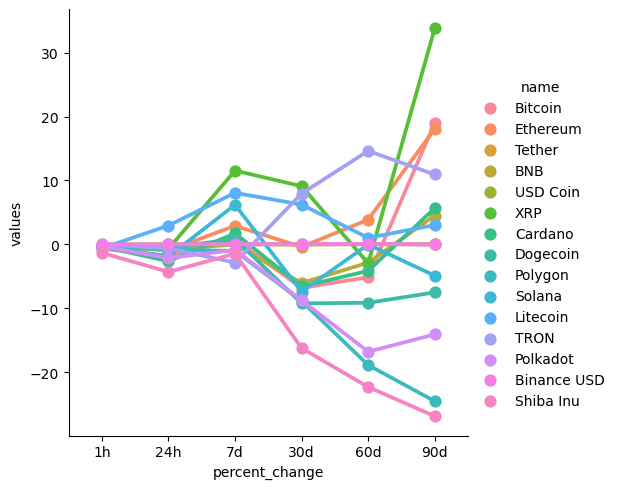

In [66]:
sns.catplot(x= 'percent_change', y='values', hue='name', data=df_rename, kind='point')

In [68]:
#Another way
#for single column, single bracket. for multiple column, double bracket
df_final = df[['name','quote.USD.price','timestamp']]
df_final = df_final.query("name == 'Bitcoin'")
df_final

,name,quote.USD.price,timestamp
0,Bitcoin,26644.31088,2023-06-02 10:44:53.791800


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

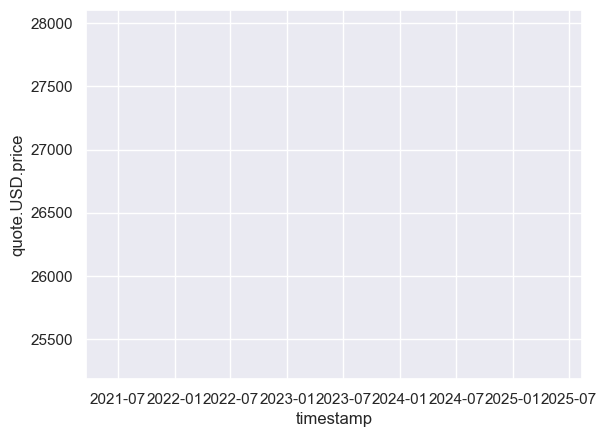

In [69]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df_final)

In [72]:
df[['name','quote.USD.price']]

,name,quote.USD.price
0,Bitcoin,26644.31088
1,Ethereum,1857.54345
2,Tether,1.00015
3,BNB,304.14882
4,USD Coin,0.99998
5,XRP,0.50621
6,Cardano,0.36349
7,Dogecoin,0.07128
8,Polygon,0.88556
9,Solana,20.41747
